In [1]:
#pip install pandas
#pip install openpyxl
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas_profiling
#!pip install -U scikit-learn
#!pip install flask

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
train_df = pd.read_excel('data/train.xlsx')
test_df = pd.read_excel('data/test.xlsx')

# Display the top 5 rows of the training dataset
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
train_df = train_df.convert_dtypes()
train_df
print(train_df.dtypes)

battery_power      Int64
blue               Int64
clock_speed      Float64
dual_sim           Int64
fc                 Int64
four_g             Int64
int_memory         Int64
m_dep            Float64
mobile_wt          Int64
n_cores            Int64
pc                 Int64
px_height          Int64
px_width           Int64
ram                Int64
sc_h               Int64
sc_w               Int64
talk_time          Int64
three_g            Int64
touch_screen       Int64
wifi               Int64
price_range        Int64
dtype: object


In [5]:
# Check for duplicate values
print(train_df.duplicated().sum())


0


In [6]:
# Check for missing values
print(train_df.isnull().sum())

# Check the data types
print('\n ---------------------------- \n \t Data Types \n ----------------------------\n')
print(train_df.dtypes)

# Summary statistics
train_df.describe()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

 ---------------------------- 
 	 Data Types 
 ----------------------------

battery_power      Int64
blue               Int64
clock_speed      Float64
dual_sim           Int64
fc                 Int64
four_g             Int64
int_memory         Int64
m_dep            Float64
mobile_wt          Int64
n_cores            Int64
pc                 Int64
px_height          Int64
px_width           Int64
ram                Int64
sc_h               Int64
sc_w               Int64
talk_time          Int64
three_g            Int64
touch_screen       Int64
wifi               Int64
price_rang

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0,2000.0,2000.0,2000.0,1995.0,1995.0,1995.0,1995.0,1996.0,1996.0,...,1996.0,1998.0,1998.0,1999.0,1999.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,1238.5185,0.495,1.52225,0.5095,4.310276,0.521303,32.04812,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011,0.7615,0.503,0.507,1.5
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.28853,35.384676,2.288946,...,443.355443,432.35293,1085.273372,4.212373,4.3574,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.0,0.0,0.5,0.0,0.0,0.0,2.0,0.1,80.0,1.0,...,0.0,500.0,256.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
25%,851.75,0.0,0.7,0.0,1.0,0.0,16.0,0.2,109.0,3.0,...,282.0,874.25,1206.5,9.0,2.0,6.0,1.0,0.0,0.0,0.75
50%,1226.0,0.0,1.5,1.0,3.0,1.0,32.0,0.5,141.0,4.0,...,564.0,1247.0,2147.5,12.0,5.0,11.0,1.0,1.0,1.0,1.5
75%,1615.25,1.0,2.2,1.0,7.0,1.0,48.0,0.8,170.0,7.0,...,947.25,1633.0,3065.5,16.0,9.0,16.0,1.0,1.0,1.0,2.25
max,1998.0,1.0,3.0,1.0,19.0,1.0,64.0,1.0,200.0,8.0,...,1960.0,1998.0,3998.0,19.0,18.0,20.0,1.0,1.0,1.0,3.0


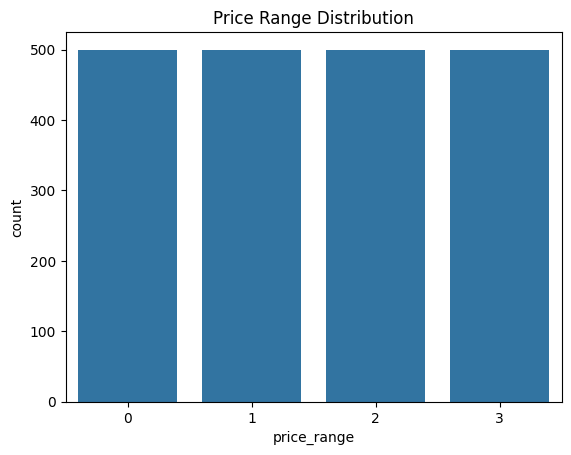

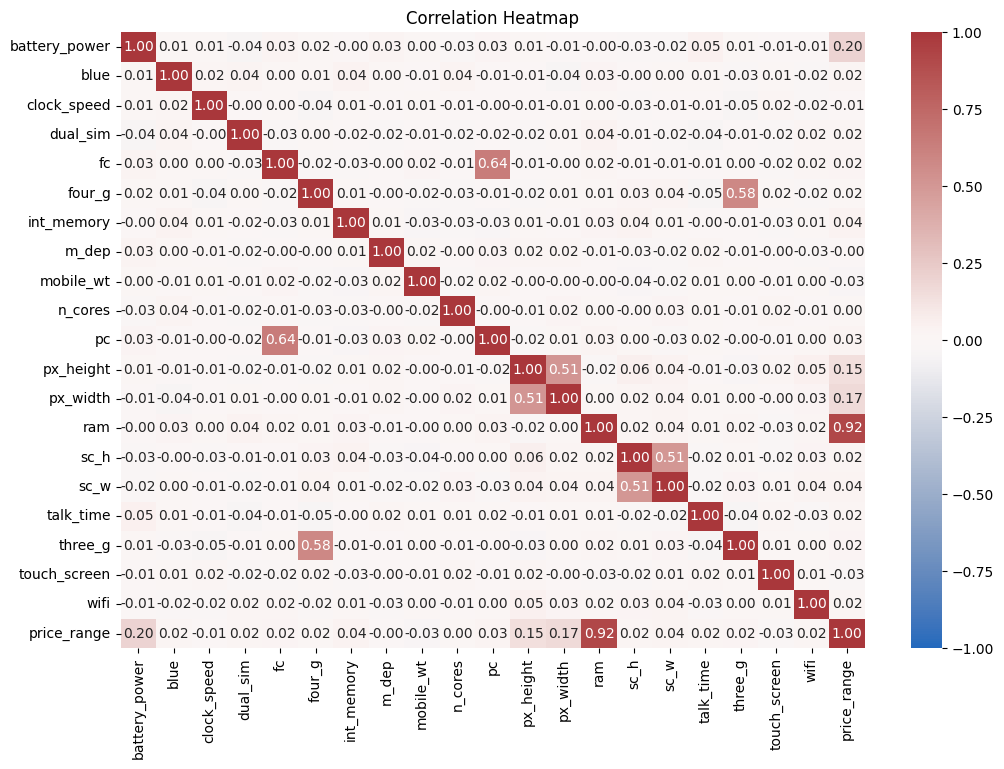

In [7]:
# Plot the distribution of the target variable
sns.countplot(x='price_range', data=train_df)
plt.title('Price Range Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f',vmin=-1, vmax=1, center=0,cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

## From the above analysis it seems the dataset fields are weak correlated except for the ram and price_range which are high correlated. Thus Ram is the strong feature that affect the price_range target values (the more ram the higher price).

It's obvious to consider as well that pc and fc features are somehow strongly correlated and affect each other.

In [8]:
# replacing missing values  
for column in train_df.select_dtypes(include=['int64']).columns:
    if train_df[column].isnull().sum() > 0:
        train_df[column].fillna(train_df[column].mean().round(0), inplace=True)
        
train_df_cleaned = train_df.fillna(train_df.mean(),downcast='infer')
train_df_cleaned.head(160)

C:\Users\Damasco\AppData\Local\Temp\ipykernel_3132\3922645561.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mean().round(0), inplace=True)
C:\Users\Damasco\AppData\Local\Temp\ipykernel_3132\3922645561.py:6: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  train_df_cleaned = train_df.fillna(tra

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1692,0,2.3,1,4,1,46,0.9,139,1,...,674,1925,1394,16,10,6,1,1,0,1
156,637,0,2.3,0,3,1,60,0.8,97,4,...,1125,1989,374,18,4,8,1,0,1,0
157,1224,0,0.5,0,4,1,32,0.502256,140,5,...,747,826,506,10,0,11,1,1,1,0
158,1356,0,2.8,0,4,1,32,0.502256,140,5,...,1612,1983,3702,17,0,19,0,0,0,3


In [9]:
# Check for missing values
print(train_df_cleaned.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [10]:
train_df_cleaned.to_csv("data/train_cleaned.csv", index=False)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.85      0.86        91
           2       0.78      0.86      0.82        92
           3       0.95      0.87      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400

[[101   4   0   0]
 [  7  77   7   0]
 [  0   8  79   5]
 [  0   0  15  97]]


In [16]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array([data['battery_power'], data['blue'], data['clock_speed'], data['dual_sim'],
                         data['fc'], data['four_g'], data['int_memory'], data['m_dep'], data['mobile_wt'],
                         data['n_cores'], data['pc'], data['px_height'], data['px_width'], data['ram'],
                         data['sc_h'], data['sc_w'], data['talk_time'], data['three_g'], data['touch_screen'],
                         data['wifi']]).reshape(1, -1)
    features = scaler.transform(features)
    prediction = model.predict(features)
    return jsonify({'price_range': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
